In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
df=pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Киров/Квартиры_Киров_выбока_2.xlsx', sheet_name = 0)
df.head()

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1,0,0,0,0,1,0,1,0,0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0,1,0,1,0,0,0,0,1,0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1,0,0,1,0,0,0,1,0,0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0,1,0,1,0,0,0,1,0,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0,1,0,0,0,1,1,0,0,0


1. Выборка 1 - без исключения выбросов (с учетом нормализации и стандартизации).
2. Выборка 2 - исключение экстремальных выбросов.
3. Выборка 3 - исключение выбросов по общей площади и цене.
4. Выборка 4 - исключение выбросов по логарифмированным общей площади и цене.
5. Выборка 5 - исключение выбросов алгоритмом KNN.

<font size = 3><div style="text-align: justify">**Выборка 1:**</div></font>

In [3]:
df_v1 = df.copy()
len(df_v1)

2399

In [5]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

X = np.array(X)
Y = np.array(Y)

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
mean = X_train.mean(axis = 0) # вычисляем среднее
X_train -= mean # отнимаем среднее
std = X_train.std(axis = 0) # вычисляем стандартное отклонение
X_train /= std # делим на стандартное отклонение

# для подготовки тестовых данных делаем аналогично
X_test -= mean # отнимаем
X_test /= std # делим

In [7]:
X_train.shape[1]

24

In [8]:
n = 128

model1 = Sequential()
model1.add(Dense(n, activation = 'relu', input_shape = (X_train.shape[1],)))
model1.add(Dense(n//2, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [10]:
epochs = 20
optimizer = 'SGD'

model1.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist1 = model1.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 10,
                   verbose = 1,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model1.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist1.history['loss']
train_mae = hist1.history['mae']

pred_test = model1.predict(X_test)
pred_train = model1.predict(X_train)

print('-----------------------------')
print(train_mse[19], train_mae[19])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

Epoch 1/20
192/192 [==============================] - 1s 2ms/step - loss: 0.0621 - mae: 0.1970 - val_loss: 0.2047 - val_mae: 0.3806
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0671 - mae: 0.2019 - val_loss: 0.0783 - val_mae: 0.2175
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0638 - mae: 0.2012 - val_loss: 0.1206 - val_mae: 0.2904
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0485 - mae: 0.1732 - val_loss: 0.0527 - val_mae: 0.1713
Epoch 5/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0563 - mae: 0.1881 - val_loss: 0.0667 - val_mae: 0.1937
Epoch 6/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0513 - mae: 0.1766 - val_loss: 0.2544 - val_mae: 0.4450
Epoch 7/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0511 - mae: 0.1767 - val_loss: 0.1248 - val_mae: 0.2840
Epoch 8/20
192/192 [==============================] - 0s 2ms/step - loss: 0.

In [11]:
epochs = 20
optimizer = 'rmsprop'

model1.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist1 = model1.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 10,
                   verbose = 1,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model1.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist1.history['loss']
train_mae = hist1.history['mae']

pred_test = model1.predict(X_test)
pred_train = model1.predict(X_train)

print('-----------------------------')
print(train_mse[19], train_mae[19])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

Epoch 1/20
192/192 [==============================] - 1s 2ms/step - loss: 0.0996 - mae: 0.2448 - val_loss: 0.2364 - val_mae: 0.4009
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0943 - mae: 0.2426 - val_loss: 0.1241 - val_mae: 0.2818
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0931 - mae: 0.2411 - val_loss: 0.1455 - val_mae: 0.3172
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0900 - mae: 0.2342 - val_loss: 0.0707 - val_mae: 0.2035
Epoch 5/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0864 - mae: 0.2330 - val_loss: 0.1053 - val_mae: 0.2544
Epoch 6/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0855 - mae: 0.2332 - val_loss: 0.0970 - val_mae: 0.2354
Epoch 7/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0856 - mae: 0.2274 - val_loss: 0.1121 - val_mae: 0.2463
Epoch 8/20
192/192 [==============================] - 0s 2ms/step - loss: 0.

In [12]:
epochs = 20
optimizer = 'Adam'

model1.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist1 = model1.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 10,
                   verbose = 1,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model1.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist1.history['loss']
train_mae = hist1.history['mae']

pred_test = model1.predict(X_test)
pred_train = model1.predict(X_train)

print('-----------------------------')
print(train_mse[19], train_mae[19])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

Epoch 1/20
192/192 [==============================] - 1s 2ms/step - loss: 0.0532 - mae: 0.1778 - val_loss: 0.0559 - val_mae: 0.1785
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0470 - mae: 0.1670 - val_loss: 0.0716 - val_mae: 0.2063
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0486 - mae: 0.1712 - val_loss: 0.0610 - val_mae: 0.1908
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0396 - mae: 0.1542 - val_loss: 0.0589 - val_mae: 0.1833
Epoch 5/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0445 - mae: 0.1631 - val_loss: 0.0702 - val_mae: 0.1994
Epoch 6/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.1562 - val_loss: 0.0596 - val_mae: 0.1812
Epoch 7/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0411 - mae: 0.1561 - val_loss: 0.0726 - val_mae: 0.2038
Epoch 8/20
192/192 [==============================] - 0s 2ms/step - loss: 0.

In [24]:
model1 = Sequential()
model1.add(Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 256)               6400      
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 47,617
Trainable params: 47,617
Non-trainable params: 0
_________________________________________________________________


In [26]:
%%time

epochs = 200
optimizer = 'rmsprop' #rmsprop, Adam

model1.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist1 = model1.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 10,
                   verbose = 0,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model1.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist1.history['loss']
train_mae = hist1.history['mae']

pred_test = model1.predict(X_test)
pred_train = model1.predict(X_train)

print('-----------------------------')
print(train_mse[epochs-1], train_mae[epochs-1])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

60/60 [==============================] - 0s 1ms/step
-----------------------------
0.03104516677558422 0.14032447338104248
Train R2 0.955
-----------------------------
0.04631577804684639 0.15864428877830505
Test R2 0.833
CPU times: total: 1min 8s
Wall time: 58.2 s


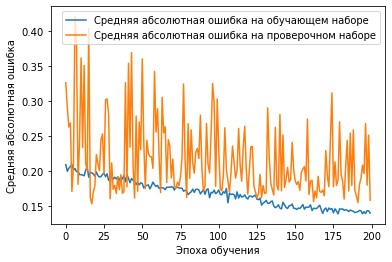

In [27]:
# Считаем графики ошибки
plt.plot(hist1.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(hist1.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


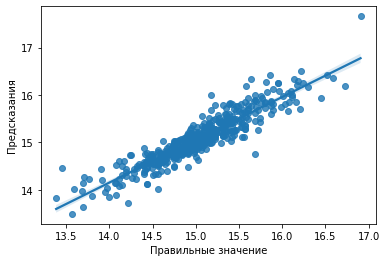

In [28]:
sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

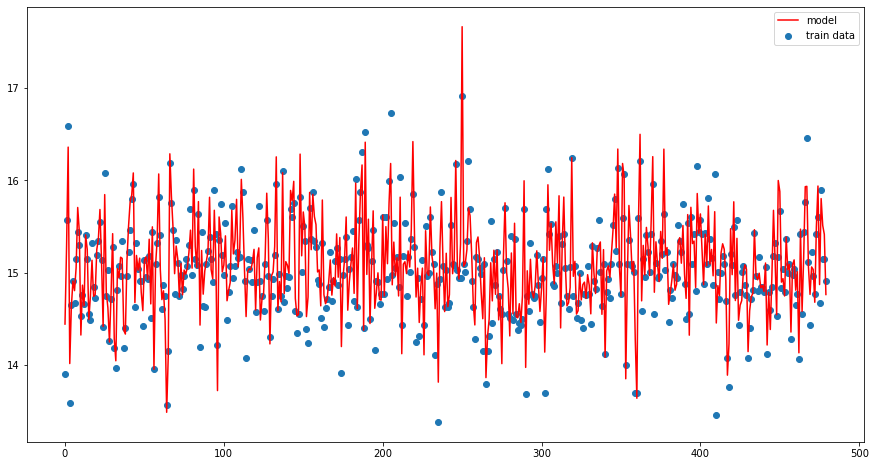

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), pred_test, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='train data')
plt.legend();

In [31]:
# Сохранение модели
model1.save('model1.h5')

In [51]:
X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
#X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

Y = df_v1['Цена']
#Y = df_v1['LN(Цена)']

X = np.array(X)
Y = np.array(Y)

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [52]:
mean = X_train.mean(axis = 0) # вычисляем среднее
X_train -= mean # отнимаем среднее
std = X_train.std(axis = 0) # вычисляем стандартное отклонение
X_train /= std # делим на стандартное отклонение

# для подготовки тестовых данных делаем аналогично
X_test -= mean # отнимаем
X_test /= std # делим

In [65]:
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1, activation = 'linear'))

model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 256)               6656      
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 1)                 65        
                                                                 
Total params: 47,873
Trainable params: 47,873
Non-trainable params: 0
_________________________________________________________________


60/60 [==============================] - 0s 1ms/step
-----------------------------
556611796992.0 441645.0
Train R2 0.916
-----------------------------
1026473525248.0 584412.875
Test R2 0.822


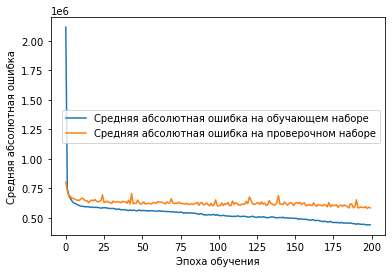

CPU times: total: 9min 17s
Wall time: 8min 24s


In [66]:
%%time

epochs = 200
optimizer = 'Adam' #rmsprop, Adam

model2.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist2 = model2.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 1,
                   verbose = 0,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model2.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist2.history['loss']
train_mae = hist2.history['mae']

pred_test = model2.predict(X_test)
pred_train = model2.predict(X_train)

print('-----------------------------')
print(train_mse[epochs-1], train_mae[epochs-1])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

# Считаем графики ошибки
plt.plot(hist2.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(hist2.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


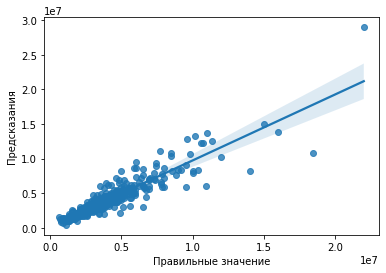

In [67]:
sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

<font size = 3><div style="text-align: justify">**Вывод по выборке 1:**</div></font>

<font size = 3><div style="text-align: justify">**Выборка 2:**</div></font>

In [68]:
df_v2 = df.copy()
len(df_v2)

2399

In [69]:
df_v2 = df.loc[df['Общая площадь'] < 175]
df_v2 = df_v2.loc[df_v2['Площадь кухни'] < 45]
df_v2 = df_v2.loc[df_v2['Жилая площадь'] < 80]
df_v2 = df_v2.loc[df_v2['Хронологический возраст'] < 100]
df_v2 = df_v2.loc[df_v2['Цена'] < 14800000]
len(df_v2)

2367

In [70]:
#X = df_v2[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v2[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']

X = np.array(X)
Y = np.array(Y)

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [72]:
mean = X_train.mean(axis = 0) # вычисляем среднее
X_train -= mean # отнимаем среднее
std = X_train.std(axis = 0) # вычисляем стандартное отклонение
X_train /= std # делим на стандартное отклонение

# для подготовки тестовых данных делаем аналогично
X_test -= mean # отнимаем
X_test /= std # делим

In [75]:
model3 = Sequential()
model3.add(Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(1)) #activation = 'linear'

model3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               6400      
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 1)                 65        
                                                                 
Total params: 47,617
Trainable params: 47,617
Non-trainable params: 0
_________________________________________________________________


60/60 [==============================] - 0s 3ms/step
-----------------------------
0.014295040629804134 0.09303522855043411
Train R2 0.953
-----------------------------
0.03939661756157875 0.14381371438503265
Test R2 0.854


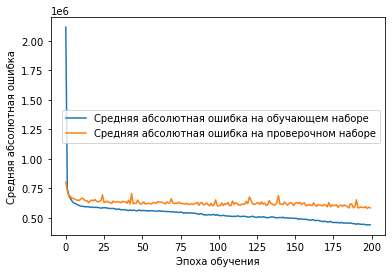

CPU times: total: 17min 37s
Wall time: 14min 49s


In [76]:
%%time

epochs = 200
optimizer = 'Adam' #rmsprop, Adam

model3.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist3 = model3.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 1,
                   verbose = 0,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model3.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist3.history['loss']
train_mae = hist3.history['mae']

pred_test = model3.predict(X_test)
pred_train = model3.predict(X_train)

print('-----------------------------')
print(train_mse[epochs-1], train_mae[epochs-1])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

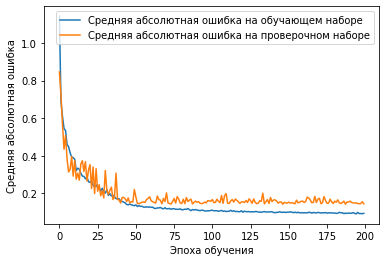

In [79]:
# Считаем графики ошибки
plt.plot(hist3.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(hist3.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


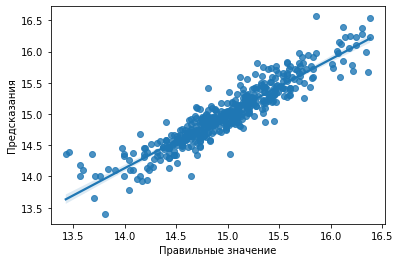

In [77]:
sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [78]:
# Сохранение модели
model3.save('model3.h5')

<font size = 3><div style="text-align: justify">**Вывод по выборке 2:**</div></font>

<font size = 3><div style="text-align: justify">**Выборка 3:**</div></font>

In [80]:
df_v3 = df.copy()
len(df_v3)

2399

In [81]:
df_v3 = df.loc[df['Общая площадь'] < 90]
df_v3 = df_v3.loc[df_v3['Хронологический возраст'] < 100]
df_v3 = df_v3.loc[df_v3['Цена'] < 6000000]
df_v3 = df_v3.loc[df_v3['Площадь кухни'] < 30]
len(df_v3)

2075

In [82]:
#X = df_v3[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v3[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v3['Цена']
Y = df_v3['LN(Цена)']

X = np.array(X)
Y = np.array(Y)

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [83]:
mean = X_train.mean(axis = 0) # вычисляем среднее
X_train -= mean # отнимаем среднее
std = X_train.std(axis = 0) # вычисляем стандартное отклонение
X_train /= std # делим на стандартное отклонение

# для подготовки тестовых данных делаем аналогично
X_test -= mean # отнимаем
X_test /= std # делим

In [84]:
model4 = Sequential()
model4.add(Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))
model4.add(Dense(128, activation = 'relu'))
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(1)) #activation = 'linear'

model4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 256)               6400      
                                                                 
 dense_53 (Dense)            (None, 128)               32896     
                                                                 
 dense_54 (Dense)            (None, 64)                8256      
                                                                 
 dense_55 (Dense)            (None, 1)                 65        
                                                                 
Total params: 47,617
Trainable params: 47,617
Non-trainable params: 0
_________________________________________________________________


52/52 [==============================] - 0s 2ms/step
-----------------------------
0.002713118214160204 0.0381193645298481
Train R2 0.986
-----------------------------
0.03846890479326248 0.14329256117343903
Test R2 0.760


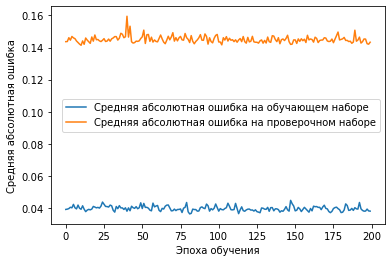

CPU times: total: 1min 16s
Wall time: 58.2 s


In [92]:
%%time

epochs = 200
optimizer = 'Adam' #rmsprop, Adam

model4.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist4 = model4.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 10,
                   verbose = 0,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model4.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist4.history['loss']
train_mae = hist4.history['mae']

pred_test = model4.predict(X_test)
pred_train = model4.predict(X_train)

print('-----------------------------')
print(train_mse[epochs-1], train_mae[epochs-1])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

# Считаем графики ошибки
plt.plot(hist4.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(hist4.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


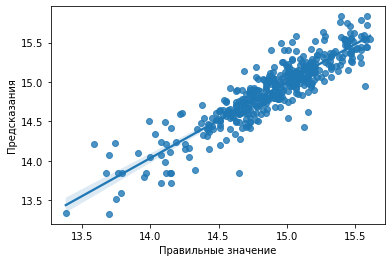

In [90]:
sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

<font size = 3><div style="text-align: justify">**Вывод по выборке 3:**</div></font>

<font size = 3><div style="text-align: justify">**Иной подход:**</div></font>

In [105]:
from tensorflow.keras.layers import Dropout, Flatten

In [152]:
df_v1 = df.copy()
len(df_v1)

2399

In [153]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

X = np.array(X)
Y = np.array(Y)

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [154]:
mean = X_train.mean(axis = 0) # вычисляем среднее
X_train -= mean # отнимаем среднее
std = X_train.std(axis = 0) # вычисляем стандартное отклонение
X_train /= std # делим на стандартное отклонение

# для подготовки тестовых данных делаем аналогично
X_test -= mean # отнимаем
X_test /= std # делим

In [155]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = Y_train.min()
max_y = Y_train.max() - min_y #"опустим" максимум на min_y
Y_train = (Y_train - min_y) / max_y #отклонение от минимума к амплитуде
Y_test = (Y_test - min_y) / max_y

In [127]:
model5 = Sequential()
model5.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
#model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

model5.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 8)                 200       
                                                                 
 dense_86 (Dense)            (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


60/60 [==============================] - 0s 992us/step
-----------------------------
0.0017802065704017878 0.03109574504196644
Train R2 0.904
-----------------------------
0.002187401754781604 0.034613706171512604
Test R2 0.877


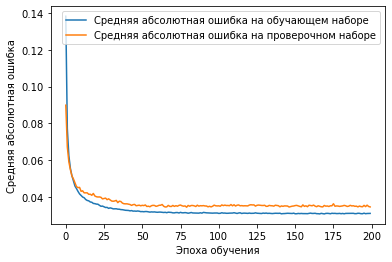

CPU times: total: 1min 3s
Wall time: 50.2 s


In [128]:
%%time

epochs = 200
optimizer = 'Adam' #rmsprop, Adam, SGD

model5.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist5 = model5.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 10,
                   verbose = 0,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model5.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist5.history['loss']
train_mae = hist5.history['mae']

pred_test = model5.predict(X_test)
pred_train = model5.predict(X_train)

print('-----------------------------')
print(train_mse[epochs-1], train_mae[epochs-1])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

# Считаем графики ошибки
plt.plot(hist5.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(hist5.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [129]:
# Сохранение модели
model5.save('model5.h5')

In [130]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model5.predict(X_test).flatten() 
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
Y_test = Y_test * max_y + min_y

15/15 [==============================] - 0s 1ms/step


In [131]:
err = np.mean(abs(pred - Y_test))
print(err)

0.13682261553589192


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


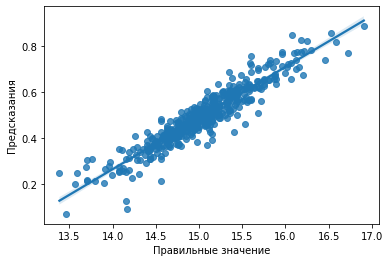

In [132]:
sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [144]:
model6 = Sequential()
model6.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
#model6.add(Dense(8, activation='relu'))
model6.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

model6.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 8)                 200       
                                                                 
 dense_92 (Dense)            (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


60/60 [==============================] - 0s 890us/step
-----------------------------
0.0017439963994547725 0.030526932328939438
Train R2 0.911
-----------------------------
0.001893516629934311 0.032427988946437836
Test R2 0.893


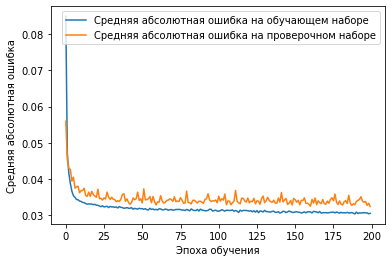

CPU times: total: 8min 56s
Wall time: 7min 57s


In [145]:
%%time

epochs = 200
optimizer = 'Adam' #rmsprop, Adam, SGD

model6.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist6 = model6.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 1,
                   verbose = 0,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model6.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist6.history['loss']
train_mae = hist6.history['mae']

pred_test = model6.predict(X_test)
pred_train = model6.predict(X_train)

print('-----------------------------')
print(train_mse[epochs-1], train_mae[epochs-1])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

# Считаем графики ошибки
plt.plot(hist6.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(hist6.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [146]:
# Сохранение модели
model6.save('model6.h5')

In [147]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model6.predict(X_test).flatten() 
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
Y_test = Y_test * max_y + min_y

15/15 [==============================] - 0s 1ms/step


In [148]:
err = np.mean(abs(pred - Y_test))
print(err)

0.12818283588252752


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


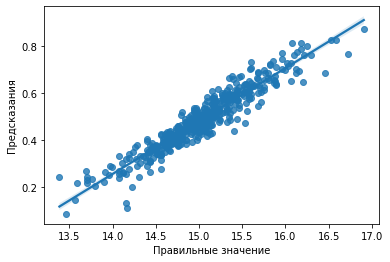

In [149]:
sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [156]:
model7 = Sequential()
model7.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
#model7.add(Dense(8, activation='relu'))
model7.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

model7.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 8)                 200       
                                                                 
 dense_96 (Dense)            (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


60/60 [==============================] - 0s 997us/step
-----------------------------
0.0016790586523711681 0.030179912224411964
Train R2 0.914
-----------------------------
0.0019084246596321464 0.03307024762034416
Test R2 0.893


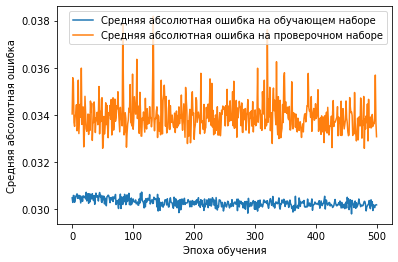

CPU times: total: 19min 26s
Wall time: 17min 46s


In [159]:
%%time

epochs = 500
optimizer = 'Adam' #rmsprop, Adam, SGD

model7.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

hist7 = model7.fit(X_train, Y_train,
                   epochs = epochs,
                   batch_size = 1,
                   verbose = 0,
                   validation_data = (X_test, Y_test))

test_mse, test_mae = model7.evaluate(X_test, Y_test, verbose = 0)
train_mse = hist7.history['loss']
train_mae = hist7.history['mae']

pred_test = model7.predict(X_test)
pred_train = model7.predict(X_train)

print('-----------------------------')
print(train_mse[epochs-1], train_mae[epochs-1])
print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print('-----------------------------')
print(test_mse, test_mae)
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

# Считаем графики ошибки
plt.plot(hist7.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(hist7.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [160]:
# Сохранение модели
model7.save('model7.h5')

In [161]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model6.predict(X_test).flatten() 
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
Y_test = Y_test * max_y + min_y

15/15 [==============================] - 0s 2ms/step


In [162]:
err = np.mean(abs(pred - Y_test))
print(err)

0.12818283588252752


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


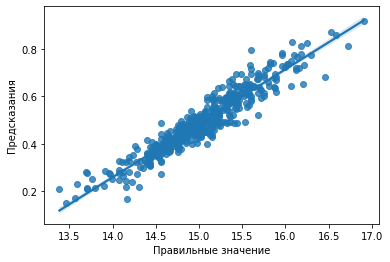

In [163]:
sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

<font size = 3><div style="text-align: justify">**Вывод:**</div></font>

Лучшими моделями являются - 6 и 7 модели.

In [ ]:
from keras.models import load_model

# Загрузка модели с диска
load_model('model.h5').summary()